In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [2]:
probadf = pd.DataFrame()

In [3]:
df = pd.read_csv('final_combined_dataset.csv')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,0,0,15,0,0,1,1,1,0,2,...,3,1,2,1,1,1,4,13,13,13
1,0,0,15,0,0,1,1,1,2,2,...,3,3,4,2,4,5,2,13,11,11
2,0,0,15,0,0,1,2,2,0,2,...,4,3,1,1,1,2,8,14,13,12
3,0,0,15,0,0,1,2,4,3,1,...,4,3,2,1,1,5,2,10,11,10
4,0,0,15,0,0,1,3,3,3,3,...,4,2,1,2,3,3,2,13,13,13


In [5]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [7]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [8]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [9]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [10]:
fildf = df.loc[:,keepcol]

In [11]:
fildf_x = fildf.loc[:,xfeatures]

In [12]:
fildf_y = fildf.loc[:,yfeatures]

In [13]:
fildf_x.shape

(882, 32)

In [14]:
fildf_y.shape

(882, 32)

In [15]:
def convertmarks(mark):
    if mark<10:
        return 'B'
    else:
        return 'A'

In [16]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [17]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [18]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [19]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [20]:
fildf_y['New G3']

0      A
1      A
2      A
3      A
4      A
      ..
877    A
878    A
879    A
880    A
881    A
Name: New G3, Length: 882, dtype: object

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [23]:
fildf_y['New G3']

0      0
1      0
2      0
3      0
4      0
      ..
877    0
878    0
879    0
880    0
881    0
Name: New G3, Length: 882, dtype: int64

In [24]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [25]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [26]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [27]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_y['New G3']
target_y_G1 = fildf_y['New G1']

In [28]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [29]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [73]:
clf = GaussianNB()

In [74]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
probagnbG1x = clf.predict_proba(X_test_x_G1)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       178
           1       0.55      0.74      0.63        43

    accuracy                           0.83       221
   macro avg       0.74      0.80      0.76       221
weighted avg       0.86      0.83      0.84       221

Kappa Score: 0.5282409277101483


In [76]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
probagnbG3x = clf.predict_proba(X_test_x_G3)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       164
           1       0.61      0.75      0.67        57

    accuracy                           0.81       221
   macro avg       0.76      0.79      0.77       221
weighted avg       0.83      0.81      0.82       221

Kappa Score: 0.5403585223333663


In [77]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
probagnbG1y = clf.predict_proba(X_test_y_G1)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       193
           1       0.77      0.36      0.49        28

    accuracy                           0.90       221
   macro avg       0.84      0.67      0.72       221
weighted avg       0.90      0.90      0.89       221

Kappa Score: 0.4430577223088923


In [78]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
probagnbG3y = clf.predict_proba(X_test_y_G3)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       199
           1       0.80      0.36      0.50        22

    accuracy                           0.93       221
   macro avg       0.87      0.68      0.73       221
weighted avg       0.92      0.93      0.92       221

Kappa Score: 0.46682750301568154


In [79]:
proba_gnbG1x = []
for i in range(len(probagnbG1x)):
    proba_gnbG1x.append(round(probagnbG1x[i][1],4))
proba_gnbG3x = []
for i in range(len(probagnbG3x)):
    proba_gnbG3x.append(round(probagnbG3x[i][1],4))
proba_gnbG1y = []
for i in range(len(probagnbG1y)):
    proba_gnbG1y.append(round(probagnbG1y[i][1],4))
proba_gnbG3y = []
for i in range(len(probagnbG3y)):
    proba_gnbG3y.append(round(probagnbG3y[i][1],4))
probadf["Prob of G1x Using GNB"] = proba_gnbG1x
probadf["Prob of G3x Using GNB"] = proba_gnbG3x
probadf["Prob of G1y Using GNB"] = proba_gnbG1y
probadf["Prob of G3y Using GNB"] = proba_gnbG3y

In [80]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,...,Prob of G1y Using LSVM,Prob of G3y Using LSVM,Prob of G1x Using LG,Prob of G3x Using LG,Prob of G1y Using LG,Prob of G3y Using LG,Prob of G1x Using GB,Prob of G3x Using GB,Prob of G1y Using GB,Prob of G3y Using GB
0,0.9936,0.9962,0.0000,0.0000,1.0,1.0,0.0,0.0,0.12,0.12,...,0.0007,0.0007,0.0640,0.0640,0.0000,0.0000,0.4507,0.4507,0.0016,0.0016
1,0.0182,0.0454,0.1067,0.3490,0.0,0.0,0.0,0.0,0.16,0.16,...,0.1553,0.1553,0.1772,0.1772,0.0938,0.0938,0.0130,0.0130,0.0117,0.0117
2,0.0289,0.0107,0.0009,0.0014,0.0,0.0,0.0,0.0,0.01,0.01,...,0.1056,0.1056,0.0050,0.0050,0.0494,0.0494,0.0033,0.0033,0.0106,0.0106
3,0.0066,0.0118,0.0085,0.0040,0.0,0.0,0.0,0.0,0.04,0.04,...,0.0470,0.0470,0.0659,0.0659,0.0341,0.0341,0.0038,0.0038,0.0022,0.0022
4,1.0000,1.0000,0.0674,0.0323,0.0,0.0,0.0,0.0,0.18,0.18,...,0.1915,0.1915,0.4984,0.4984,0.3047,0.3047,0.1522,0.1522,0.1336,0.1336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0248,0.0116,0.0163,0.0171,0.0,0.0,0.0,0.0,0.05,0.05,...,0.0332,0.0332,0.0030,0.0030,0.0169,0.0169,0.0207,0.0207,0.0291,0.0291
217,0.0152,0.0047,0.0135,0.0104,0.0,0.0,0.0,0.0,0.02,0.02,...,0.0350,0.0350,0.0141,0.0141,0.0141,0.0141,0.0058,0.0058,0.0058,0.0058
218,0.0120,0.0232,0.0003,0.0000,0.0,0.0,0.0,0.0,0.05,0.05,...,0.0162,0.0162,0.1060,0.1060,0.0037,0.0037,0.0024,0.0024,0.0044,0.0044
219,0.0211,0.0091,0.0012,0.0000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0288,0.0288,0.0006,0.0006,0.0073,0.0073,0.0041,0.0041,0.0012,0.0012


### Decision Tree

In [81]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       172
           1       0.60      0.71      0.65        49

    accuracy                           0.83       221
   macro avg       0.76      0.79      0.77       221
weighted avg       0.85      0.83      0.84       221

Kappa Score: 0.5447865055948339
	
Feature failures.x and its importance is 0.38364369260979675
Feature absences.x and its importance is 0.07348836415921953
Feature Fjob and its importance is 0.06819488291064874
Feature Mjob and its importance is 0.051244030950532655
Feature Medu and its importance is 0.03889491092964933
Feature Walc.x and its importance is 0.035105806711669615
Feature goout.x and its importance is 0.03362924115356891
Feature health.x and its importance is 0.030232368254180388
Feature studytime.x and its importance is 0.02826959077303612
Feature romantic.x and its importance is 0.026317453375259908
Feature guardian.x and its importance is 0.02171058

([<matplotlib.axis.XTick at 0x7fddcea82b10>,
 <a list of 30 Text xticklabel objects>)

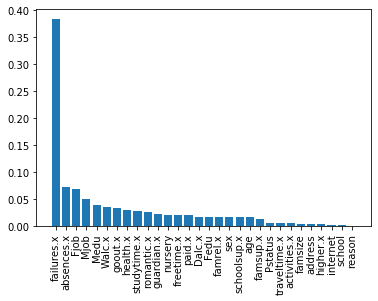

In [82]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
probadtcG1x = dtc.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       167
           1       0.54      0.70      0.61        54

    accuracy                           0.78       221
   macro avg       0.71      0.75      0.73       221
weighted avg       0.81      0.78      0.79       221

Kappa Score: 0.4573833742546475
	
Feature failures.x and its importance is 0.28002780219166884
Feature schoolsup.x and its importance is 0.1955576046967613
Feature absences.x and its importance is 0.06600077029333286
Feature paid.x and its importance is 0.036137000004939676
Feature Dalc.x and its importance is 0.03445171081911429
Feature Medu and its importance is 0.03258760172872816
Feature age and its importance is 0.03203695929484462
Feature goout.x and its importance is 0.028712944690403606
Feature health.x and its importance is 0.028098469290562183
Feature romantic.x and its importance is 0.026434934615819704
Feature freetime.x and its importance is 0.02408023

([<matplotlib.axis.XTick at 0x7fddd065b4d0>,
 <a list of 30 Text xticklabel objects>)

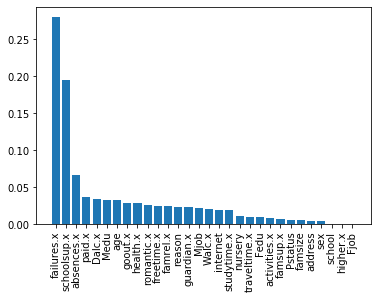

In [83]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
probadtcG3x = dtc.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       202
           1       0.31      0.21      0.25        19

    accuracy                           0.89       221
   macro avg       0.62      0.58      0.60       221
weighted avg       0.87      0.89      0.88       221

Kappa Score: 0.19367588932806323
	
Feature absences.y and its importance is 0.11030430615548241
Feature higher.y and its importance is 0.0967584451834115
Feature reason and its importance is 0.08481928850497232
Feature failures.y and its importance is 0.08113469499971981
Feature Mjob and its importance is 0.05748447037217094
Feature schoolsup.y and its importance is 0.057068113520438245
Feature traveltime.y and its importance is 0.05114811023938588
Feature Pstatus and its importance is 0.04210915977961435
Feature studytime.y and its importance is 0.0383653271921539
Feature goout.y and its importance is 0.038276831393714524
Feature school and its importance is 0.037

([<matplotlib.axis.XTick at 0x7fddd090ebd0>,
 <a list of 30 Text xticklabel objects>)

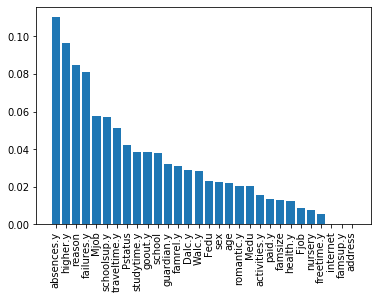

In [84]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
probadtcG1y = dtc.predict_proba(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       210
           1       0.40      0.36      0.38        11

    accuracy                           0.94       221
   macro avg       0.68      0.67      0.68       221
weighted avg       0.94      0.94      0.94       221

Kappa Score: 0.35014702555982813
	
Feature reason and its importance is 0.14885694564694568
Feature Medu and its importance is 0.1307956914166634
Feature failures.y and its importance is 0.08332227768969795
Feature freetime.y and its importance is 0.0757946666666667
Feature age and its importance is 0.0669332293697206
Feature higher.y and its importance is 0.06577849319908087
Feature famsup.y and its importance is 0.05761647910626239
Feature famrel.y and its importance is 0.04406666666666668
Feature address and its importance is 0.039217001763668366
Feature sex and its importance is 0.039170370370370376
Feature guardian.y and its importance is 0.037983389450056124


([<matplotlib.axis.XTick at 0x7fddd0ac8a90>,
 <a list of 30 Text xticklabel objects>)

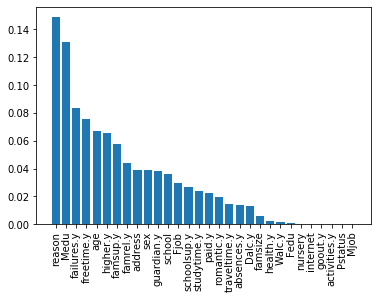

In [85]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
probadtcG3y = dtc.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)


In [86]:
proba_dtcG1x = []
for i in range(len(probadtcG1x)):
    proba_dtcG1x.append(round(probadtcG1x[i][1],4))
proba_dtcG3x = []
for i in range(len(probadtcG3x)):
    proba_dtcG3x.append(round(probadtcG3x[i][1],4))
proba_dtcG1y = []
for i in range(len(probadtcG1y)):
    proba_dtcG1y.append(round(probadtcG1y[i][1],4))
proba_dtcG3y = []
for i in range(len(probadtcG3y)):
    proba_dtcG3y.append(round(probadtcG3y[i][1],4))
probadf["Prob of G1x Using DTC"] = proba_dtcG1x
probadf["Prob of G3x Using DTC"] = proba_dtcG3x
probadf["Prob of G1y Using DTC"] = proba_dtcG1y
probadf["Prob of G3y Using DTC"] = proba_dtcG3y

In [87]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,...,Prob of G1y Using LSVM,Prob of G3y Using LSVM,Prob of G1x Using LG,Prob of G3x Using LG,Prob of G1y Using LG,Prob of G3y Using LG,Prob of G1x Using GB,Prob of G3x Using GB,Prob of G1y Using GB,Prob of G3y Using GB
0,0.9936,0.9962,0.0000,0.0000,0.0,0.0,0.0,0.0,0.12,0.12,...,0.0007,0.0007,0.0640,0.0640,0.0000,0.0000,0.4507,0.4507,0.0016,0.0016
1,0.0182,0.0454,0.1067,0.3490,0.0,0.0,0.0,0.0,0.16,0.16,...,0.1553,0.1553,0.1772,0.1772,0.0938,0.0938,0.0130,0.0130,0.0117,0.0117
2,0.0289,0.0107,0.0009,0.0014,0.0,0.0,0.0,0.0,0.01,0.01,...,0.1056,0.1056,0.0050,0.0050,0.0494,0.0494,0.0033,0.0033,0.0106,0.0106
3,0.0066,0.0118,0.0085,0.0040,0.0,0.0,0.0,0.0,0.04,0.04,...,0.0470,0.0470,0.0659,0.0659,0.0341,0.0341,0.0038,0.0038,0.0022,0.0022
4,1.0000,1.0000,0.0674,0.0323,1.0,1.0,0.0,0.0,0.18,0.18,...,0.1915,0.1915,0.4984,0.4984,0.3047,0.3047,0.1522,0.1522,0.1336,0.1336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0248,0.0116,0.0163,0.0171,0.0,0.0,0.0,0.0,0.05,0.05,...,0.0332,0.0332,0.0030,0.0030,0.0169,0.0169,0.0207,0.0207,0.0291,0.0291
217,0.0152,0.0047,0.0135,0.0104,0.0,0.0,0.0,0.0,0.02,0.02,...,0.0350,0.0350,0.0141,0.0141,0.0141,0.0141,0.0058,0.0058,0.0058,0.0058
218,0.0120,0.0232,0.0003,0.0000,0.0,0.0,0.0,0.0,0.05,0.05,...,0.0162,0.0162,0.1060,0.1060,0.0037,0.0037,0.0024,0.0024,0.0044,0.0044
219,0.0211,0.0091,0.0012,0.0000,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0288,0.0288,0.0006,0.0006,0.0073,0.0073,0.0041,0.0041,0.0012,0.0012


### Random Forest Classifier

In [90]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       189
           1       0.53      0.97      0.69        32

    accuracy                           0.87       221
   macro avg       0.76      0.91      0.80       221
weighted avg       0.93      0.87      0.89       221

Kappa Score: 0.6175052540487082
	
Feature failures.x and its importance is 0.2841129895177551
Feature absences.x and its importance is 0.05483330523316223
Feature Fedu and its importance is 0.04202822248185905
Feature Mjob and its importance is 0.04136539854253313
Feature Medu and its importance is 0.03927812919426583
Feature age and its importance is 0.03684577764808381
Feature health.x and its importance is 0.036412740530127524
Feature Walc.x and its importance is 0.036199797216195435
Feature Fjob and its importance is 0.03461060257907685
Feature freetime.x and its importance is 0.0344981721280444
Feature goout.x and its importance is 0.03354453857564003
Feature 

([<matplotlib.axis.XTick at 0x7fddd0c8a990>,
 <a list of 30 Text xticklabel objects>)

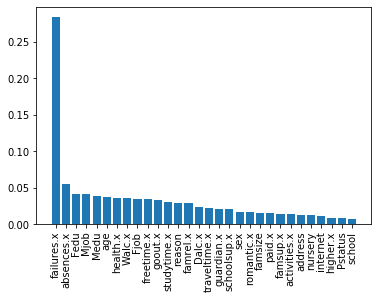

In [91]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
probarfG1x = rf.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       172
           1       0.63      0.92      0.75        49

    accuracy                           0.86       221
   macro avg       0.80      0.88      0.83       221
weighted avg       0.90      0.86      0.87       221

Kappa Score: 0.6610775994274614
	
Feature failures.x and its importance is 0.21810799727312277
Feature schoolsup.x and its importance is 0.12344372467981327
Feature absences.x and its importance is 0.06156874781869444
Feature age and its importance is 0.04017292673676799
Feature Mjob and its importance is 0.03726197935107988
Feature goout.x and its importance is 0.03710176073103236
Feature Fedu and its importance is 0.03432316829242043
Feature freetime.x and its importance is 0.03412517702891111
Feature Walc.x and its importance is 0.033590560904410906
Feature Medu and its importance is 0.033198247855718184
Feature health.x and its importance is 0.03119110407367305

([<matplotlib.axis.XTick at 0x7fddd0e3e690>,
 <a list of 30 Text xticklabel objects>)

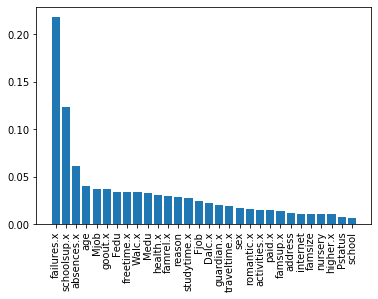

In [92]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
probarfG3x = rf.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       221
           1       0.00      0.00      0.00         0

    accuracy                           0.94       221
   macro avg       0.50      0.47      0.48       221
weighted avg       1.00      0.94      0.97       221

Kappa Score: 0.0
	
Feature failures.y and its importance is 0.0735146144380716
Feature higher.y and its importance is 0.06894969565662051
Feature absences.y and its importance is 0.05981408239801786
Feature studytime.y and its importance is 0.044724736550079545
Feature Medu and its importance is 0.04424350650434564
Feature freetime.y and its importance is 0.043388193539203666
Feature reason and its importance is 0.04115480442455627
Feature schoolsup.y and its importance is 0.04013479791234656
Feature Mjob and its importance is 0.040099919738295506
Feature Dalc.y and its importance is 0.039557869450708674
Feature goout.y and its importance is 0.038964880354830644
Fe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([<matplotlib.axis.XTick at 0x7fddd0ffa0d0>,
 <a list of 30 Text xticklabel objects>)

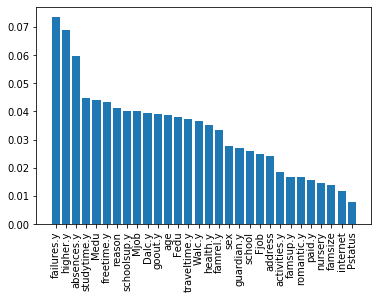

In [93]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
probarfG1y = rf.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       220
           1       0.10      1.00      0.18         1

    accuracy                           0.96       221
   macro avg       0.55      0.98      0.58       221
weighted avg       1.00      0.96      0.98       221

Kappa Score: 0.17503110742430528
	
Feature absences.y and its importance is 0.07776558486976665
Feature higher.y and its importance is 0.06059405744524324
Feature goout.y and its importance is 0.05568347504441019
Feature Dalc.y and its importance is 0.054448738153873244
Feature failures.y and its importance is 0.048228713025650724
Feature Medu and its importance is 0.04790971260718305
Feature age and its importance is 0.045117428273576135
Feature school and its importance is 0.042357974247217565
Feature health.y and its importance is 0.04187569088605469
Feature freetime.y and its importance is 0.037821709605484546
Feature studytime.y and its importance is 0.0377820

([<matplotlib.axis.XTick at 0x7fddd12cf490>,
 <a list of 30 Text xticklabel objects>)

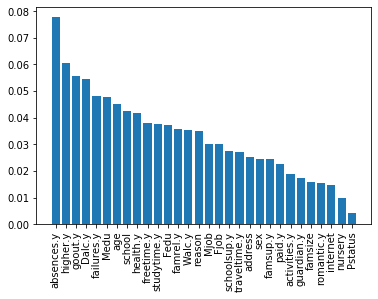

In [94]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
probarfG3y = rf.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

In [95]:
proba_rfG1x = []
for i in range(len(probarfG1x)):
    proba_rfG1x.append(round(probarfG1x[i][1],4))
proba_rfG3x = []
for i in range(len(probarfG3x)):
    proba_rfG3x.append(round(probarfG3x[i][1],4))
proba_rfG1y = []
for i in range(len(probarfG1y)):
    proba_rfG1y.append(round(probarfG1y[i][1],4))
proba_rfG3y = []
for i in range(len(probarfG3y)):
    proba_rfG3y.append(round(probarfG3y[i][1],4))
probadf["Prob of G1x Using RF"] = proba_rfG1x
probadf["Prob of G3x Using RF"] = proba_rfG3x
probadf["Prob of G1y Using RF"] = proba_rfG1y
probadf["Prob of G3y Using RF"] = proba_rfG3y

In [101]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,...,Prob of G1y Using LSVM,Prob of G3y Using LSVM,Prob of G1x Using LG,Prob of G3x Using LG,Prob of G1y Using LG,Prob of G3y Using LG,Prob of G1x Using GB,Prob of G3x Using GB,Prob of G1y Using GB,Prob of G3y Using GB
0,0.9936,0.9962,0.0000,0.0000,0.0,0.0,0.0,0.0,0.21,0.40,...,0.0007,0.0007,0.0640,0.0640,0.0000,0.0000,0.4507,0.4507,0.0016,0.0016
1,0.0182,0.0454,0.1067,0.3490,0.0,0.0,0.0,0.0,0.10,0.19,...,0.1553,0.1553,0.1772,0.1772,0.0938,0.0938,0.0130,0.0130,0.0117,0.0117
2,0.0289,0.0107,0.0009,0.0014,0.0,0.0,0.0,0.0,0.07,0.06,...,0.1056,0.1056,0.0050,0.0050,0.0494,0.0494,0.0033,0.0033,0.0106,0.0106
3,0.0066,0.0118,0.0085,0.0040,0.0,0.0,0.0,0.0,0.12,0.17,...,0.0470,0.0470,0.0659,0.0659,0.0341,0.0341,0.0038,0.0038,0.0022,0.0022
4,1.0000,1.0000,0.0674,0.0323,1.0,1.0,0.0,0.0,0.80,0.68,...,0.1915,0.1915,0.4984,0.4984,0.3047,0.3047,0.1522,0.1522,0.1336,0.1336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0248,0.0116,0.0163,0.0171,0.0,0.0,0.0,0.0,0.08,0.09,...,0.0332,0.0332,0.0030,0.0030,0.0169,0.0169,0.0207,0.0207,0.0291,0.0291
217,0.0152,0.0047,0.0135,0.0104,0.0,0.0,0.0,0.0,0.14,0.05,...,0.0350,0.0350,0.0141,0.0141,0.0141,0.0141,0.0058,0.0058,0.0058,0.0058
218,0.0120,0.0232,0.0003,0.0000,0.0,0.0,0.0,0.0,0.14,0.24,...,0.0162,0.0162,0.1060,0.1060,0.0037,0.0037,0.0024,0.0024,0.0044,0.0044
219,0.0211,0.0091,0.0012,0.0000,0.0,0.0,0.0,0.0,0.20,0.12,...,0.0288,0.0288,0.0006,0.0006,0.0073,0.0073,0.0041,0.0041,0.0012,0.0012


### Linear SVM

In [102]:
from sklearn import svm
lsvm = svm.SVC(kernel='linear', probability = True)

In [103]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
probalsvmG1x = lsvm.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       186
           1       0.57      0.94      0.71        35

    accuracy                           0.88       221
   macro avg       0.78      0.90      0.82       221
weighted avg       0.92      0.88      0.89       221

Kappa Score: 0.6382101497605044


In [104]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
probalsvmG3x = lsvm.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       170
           1       0.65      0.90      0.75        51

    accuracy                           0.86       221
   macro avg       0.81      0.88      0.83       221
weighted avg       0.89      0.86      0.87       221

Kappa Score: 0.6637931034482758


In [105]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
probalsvmG1y = lsvm.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       213
           1       0.54      0.88      0.67         8

    accuracy                           0.97       221
   macro avg       0.77      0.92      0.83       221
weighted avg       0.98      0.97      0.97       221

Kappa Score: 0.6510263929618768


In [106]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
probalsvmG3y = lsvm.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       214
           1       0.30      0.43      0.35         7

    accuracy                           0.95       221
   macro avg       0.64      0.70      0.66       221
weighted avg       0.96      0.95      0.95       221

Kappa Score: 0.32789604644733195


In [107]:

proba_lsvmG1x = []
for i in range(len(probalsvmG1x)):
    proba_lsvmG1x.append(round(probalsvmG1x[i][1],4))
proba_lsvmG3x = []
for i in range(len(probalsvmG3x)):
    proba_lsvmG3x.append(round(probalsvmG3x[i][1],4))
proba_lsvmG1y = []
for i in range(len(probalsvmG1y)):
    proba_lsvmG1y.append(round(probalsvmG1y[i][1],4))
proba_lsvmG3y = []
for i in range(len(probalsvmG3y)):
    proba_lsvmG3y.append(round(probalsvmG3y[i][1],4))
probadf["Prob of G1x Using LSVM"] = proba_lsvmG1x
probadf["Prob of G3x Using LSVM"] = proba_lsvmG3x
probadf["Prob of G1y Using LSVM"] = proba_lsvmG1y
probadf["Prob of G3y Using LSVM"] = proba_lsvmG3y

### Logistic Regression

In [113]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [114]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
probalgG1x = lg.predict_proba(X_test_x_G1)

print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       191
           1       0.48      0.93      0.64        30

    accuracy                           0.86       221
   macro avg       0.74      0.89      0.77       221
weighted avg       0.92      0.86      0.87       221

Kappa Score: 0.5571142284569138


In [115]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
probalgG3x = lg.predict_proba(X_test_x_G3)

print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       179
           1       0.54      0.90      0.67        42

    accuracy                           0.83       221
   macro avg       0.75      0.86      0.78       221
weighted avg       0.89      0.83      0.85       221

Kappa Score: 0.5698353411541901


In [116]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
probalgG1y = lg.predict_proba(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       211
           1       0.46      0.60      0.52        10

    accuracy                           0.95       221
   macro avg       0.72      0.78      0.75       221
weighted avg       0.96      0.95      0.95       221

Kappa Score: 0.49595687331536387


In [117]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
probalgG3y = lg.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.40      0.57      0.47         7

    accuracy                           0.96       221
   macro avg       0.69      0.77      0.72       221
weighted avg       0.97      0.96      0.96       221

Kappa Score: 0.4500967652750898


In [118]:

proba_lgG1x = []
for i in range(len(probalgG1x)):
    proba_lgG1x.append(round(probalgG1x[i][1],4))
proba_lgG3x = []
for i in range(len(probalgG3x)):
    proba_lgG3x.append(round(probalgG3x[i][1],4))
proba_lgG1y = []
for i in range(len(probalgG1y)):
    proba_lgG1y.append(round(probalgG1y[i][1],4))
proba_lgG3y = []
for i in range(len(probalgG3y)):
    proba_lgG3y.append(round(probalgG3y[i][1],4))
probadf["Prob of G1x Using LG"] = proba_lgG1x
probadf["Prob of G3x Using LG"] = proba_lgG3x
probadf["Prob of G1y Using LG"] = proba_lgG1y
probadf["Prob of G3y Using LG"] = proba_lgG3y

In [119]:
probadf

,Prob of G1x Using GNB,Prob of G3x Using GNB,Prob of G1y Using GNB,Prob of G3y Using GNB,Prob of G1x Using DTC,Prob of G3x Using DTC,Prob of G1y Using DTC,Prob of G3y Using DTC,Prob of G1x Using RF,Prob of G3x Using RF,...,Prob of G1y Using LSVM,Prob of G3y Using LSVM,Prob of G1x Using LG,Prob of G3x Using LG,Prob of G1y Using LG,Prob of G3y Using LG,Prob of G1x Using GB,Prob of G3x Using GB,Prob of G1y Using GB,Prob of G3y Using GB
0,0.9936,0.9962,0.0000,0.0000,0.0,0.0,0.0,0.0,0.21,0.40,...,0.0017,0.0006,0.1045,0.2904,0.0006,0.0000,0.4507,0.4507,0.0016,0.0016
1,0.0182,0.0454,0.1067,0.3490,0.0,0.0,0.0,0.0,0.10,0.19,...,0.1626,0.1445,0.0472,0.1062,0.1177,0.0938,0.0130,0.0130,0.0117,0.0117
2,0.0289,0.0107,0.0009,0.0014,0.0,0.0,0.0,0.0,0.07,0.06,...,0.0610,0.0976,0.1210,0.0898,0.0465,0.0494,0.0033,0.0033,0.0106,0.0106
3,0.0066,0.0118,0.0085,0.0040,0.0,0.0,0.0,0.0,0.12,0.17,...,0.0383,0.0428,0.0268,0.2098,0.0135,0.0341,0.0038,0.0038,0.0022,0.0022
4,1.0000,1.0000,0.0674,0.0323,1.0,1.0,0.0,0.0,0.80,0.68,...,0.1496,0.1790,0.9859,0.9951,0.1863,0.3047,0.1522,0.1522,0.1336,0.1336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0248,0.0116,0.0163,0.0171,0.0,0.0,0.0,0.0,0.08,0.09,...,0.0471,0.0301,0.0558,0.0380,0.0416,0.0169,0.0207,0.0207,0.0291,0.0291
217,0.0152,0.0047,0.0135,0.0104,0.0,0.0,0.0,0.0,0.14,0.05,...,0.0828,0.0318,0.1702,0.0363,0.0695,0.0141,0.0058,0.0058,0.0058,0.0058
218,0.0120,0.0232,0.0003,0.0000,0.0,0.0,0.0,0.0,0.14,0.24,...,0.0499,0.0146,0.2145,0.2536,0.0246,0.0037,0.0024,0.0024,0.0044,0.0044
219,0.0211,0.0091,0.0012,0.0000,0.0,0.0,0.0,0.0,0.20,0.12,...,0.0630,0.0261,0.1352,0.0509,0.0992,0.0073,0.0041,0.0041,0.0012,0.0012


### Gradient Boosting

In [120]:
gb = GradientBoostingClassifier(random_state=0)

In [121]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
probagbG1x = gb.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       185
           1       0.57      0.92      0.70        36

    accuracy                           0.87       221
   macro avg       0.78      0.89      0.81       221
weighted avg       0.91      0.87      0.88       221

Kappa Score: 0.6271839980720568


In [122]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)

probagbG3x = gb.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       174
           1       0.59      0.89      0.71        47

    accuracy                           0.85       221
   macro avg       0.78      0.86      0.80       221
weighted avg       0.89      0.85      0.86       221

Kappa Score: 0.6127602556173986


In [123]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)

probagbG1y = gb.predict_proba(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       216
           1       0.23      0.60      0.33         5

    accuracy                           0.95       221
   macro avg       0.61      0.78      0.65       221
weighted avg       0.97      0.95      0.96       221

Kappa Score: 0.31081081081081074


In [124]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)

probagbG3y = gb.predict_proba(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.40      0.57      0.47         7

    accuracy                           0.96       221
   macro avg       0.69      0.77      0.72       221
weighted avg       0.97      0.96      0.96       221

Kappa Score: 0.4500967652750898


In [125]:

proba_gbG1x = []
for i in range(len(probagbG1x)):
    proba_gbG1x.append(round(probagbG1x[i][1],4))
proba_gbG3x = []
for i in range(len(probagbG3x)):
    proba_gbG3x.append(round(probagbG3x[i][1],4))
proba_gbG1y = []
for i in range(len(probagbG1y)):
    proba_gbG1y.append(round(probagbG1y[i][1],4))
proba_gbG3y = []
for i in range(len(probagbG3y)):
    proba_gbG3y.append(round(probagbG3y[i][1],4))
probadf["Prob of G1x Using GB"] = proba_gbG1x
probadf["Prob of G3x Using GB"] = proba_gbG3x
probadf["Prob of G1y Using GB"] = proba_gbG1y
probadf["Prob of G3y Using GB"] = proba_gbG3y

In [127]:
probadf.shape

(221, 24)

In [128]:
probadf.to_csv('All_Fail_Prob_Binary.csv')